In [1]:
%pylab inline
import viznet

Populating the interactive namespace from numpy and matplotlib


In [3]:
%config InlineBackend.figure_format = 'svg'

In [4]:
def _show():
    plt.axis('off')
    plt.axis('equal')
    plt.show()

# Week 5

## Cost Function

* $L$ = total number of layers in the network.
* $S_l$ = number of units (not counting bias unit) in layer $l$.
* $K = S_L$ is the number of units in the output layer.

> $h_\Theta(x) \in \mathbb{R}^K$, $(h_\theta(x))_k$ is the $k^{th}$ output of the hypothesis.

> $\displaystyle J(\Theta) = -\frac{1}{m}\bigg[\sum_{i=1}^m \sum_{k=1}^K y_k^{(i)}log(h_\Theta(x^{(i)}))_k + (1-y_k^{(i)})log(1 - (h_\Theta(x^{(i)}))_k)\bigg] + \frac{\lambda}{2m}\sum_{l=1}^L\sum_{i=1}^{S_l}\sum_{j=1}^{S_{l+1}}(\Theta_{j,i}^{(l)})^2$

> $\lambda$ is the **regularization parameter**.

> $i$ starts at $1$, we **do not** regularize $\Theta_{j,0}^{(l)}$!

## Gradient Computation



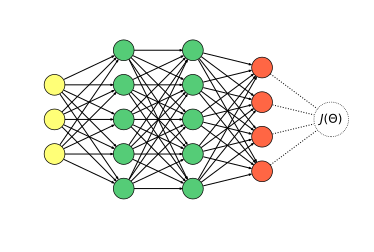

In [34]:
# Node Brushes
ib = viznet.NodeBrush('nn.input')
hb = viznet.NodeBrush('nn.hidden')
ob = viznet.NodeBrush('nn.output')
bb = viznet.NodeBrush('basic', size=0.5, ls=':')
fb = viznet.NodeBrush('invisible')

# Edge Brushes
eb = viznet.EdgeBrush('->', lw=1)
ebd = viznet.EdgeBrush(':', lw=1)

layer1 = viznet.node_sequence(ib, 3, center=(1,0.5), space=(0,-1))
layer2 = viznet.node_sequence(hb, 5, center=(3,0.5), space=(0,-1))
layer3 = viznet.node_sequence(hb, 5, center=(5,0.5), space=(0,-1))
layer4 = viznet.node_sequence(ob, 4, center=(7,0.5), space=(0,-1))
cost = viznet.node_sequence(bb, 1, center=(9,0.5), space=(0,-1))
viznet.connecta2a(layer1, layer2, eb)
viznet.connecta2a(layer2, layer3, eb)
viznet.connecta2a(layer3, layer4, eb)
viznet.connecta2a(layer4, cost, ebd)
cost[0].text(r'$J(\Theta)$')

_show()

$\displaystyle \delta^{(4)} = \frac{\partial\: J(\theta)}{\partial\: z^{(4)}} = a^{(4)} - y,\: a^{(4)} = h_\Theta(x)$

$\displaystyle \delta^{(3)} = \frac{\partial\: J(\theta)}{\partial\: z^{(3)}} = (\Theta^{(3)})^\top\delta^{(4)}\:.*\:g'(z^{(3)}) = (\Theta^{(3)})^\top\delta^{(4)}\:.*\:\frac{\partial\: a^{(3)}}{\partial\: z^{(3)}} = (\Theta^{(3)})^\top\delta^{(4)}\:.*\:a^{(3)}(1 - a^{(3)})$

$\displaystyle \delta^{(2)} = \frac{\partial\: J(\theta)}{\partial\: z^{(2)}} = (\Theta^{(2)})^\top\delta^{(3)}\:.*\:a^{(2)}(1 - a^{(2)})$

**There is no $\delta^{(1)}$!**

If we ignore $\lambda$ or if $\lambda = 0$:

> $\displaystyle \frac{\partial\: J(\Theta)}{\partial\: \Theta_{ij}^{(l)}} = a_j^{(l)}\delta_i^{(l+1)}$

## Backpropagation Algorithm

Given a training set $\{(x^{(1)},y^{(1)}),\dots,(x^{(m)},y^{(m)})\}$.

Set $\Delta_{ij}^{(l)} = 0$ (for all $l$, $i$, $j$), to serve as a gradient accumulator.

For $i = 1$ to $m$:

1. Set $a^{(1)} = x^{(i)}$.
2. Perform forward propagation to compute $a^{(l)}$ for $l = 2,3,\dots,L$.
3. Using $y^{(i)}$, compute $\delta^{(L)} = a^{(L)} - y^{(i)}$.
4. Compute $\delta^{(L-1)}, \delta^{(L-2)},\dots,\delta^{(2)}$.
5. Increment the gradient $\Delta_{ij}^{(l)} = \Delta_{ij}^{(l)} + a_j^{(l)}\delta_i^{(l+1)}$, vectorized as $\Delta^{(l)} = \Delta^{(l)} + \delta^{(l+1)}(a^{(l)})^{\top}$.

Then, we can compute the gradients:

> $\begin{array}{l}
    \displaystyle D_{ij}^{(l)} = \frac{1}{m}\:\Delta_{ij}^{(l)} + \frac{\lambda}{m}\Theta_{ij}^{(l)} & \text{if } j \neq 0 \\
    \displaystyle D_{ij}^{(l)} = \frac{1}{m}\:\Delta_{ij}^{(l)} & \text{if } j = 0
\end{array}\Bigg\}\:
\displaystyle\frac{\partial\: J(\Theta)}{\partial\: \Theta_{ij}^{(l)}} = D_{ij}^{(l)}$

## Unrolling Parameters

In advanced optimization implementations, the gradient matrix often need to be "flattened" to a single vector.

## Gradient Checking

Compute the gradient using the **Central Difference Formula**.

$\Theta \in \mathbb{R}^n$, $\Theta$ is an unrolled version of $\Theta^{(1)},\Theta^{(2)},\dots,\Theta^{(L-1)}$.

$\Theta = [\Theta_1,\Theta_2,\dots,\Theta_n]$

$\epsilon = 10^{-4}$

$\displaystyle \frac{\partial\: J(\Theta)}{\partial\: \Theta_j} \approx \frac{J(\Theta_1,\Theta_2,\dots,\Theta_j + \epsilon,\dots,\Theta_n) - J(\Theta_1,\Theta_2,\dots,\Theta_j - \epsilon,\dots,\Theta_n)}{2\epsilon}$

Octave implementation:

```octave
for i=1:n,
    thetaPlus = theta;
    thetaPlus(i) = thetaPlus(i) + EPSILON;
    thetaMinus = theta;
    thetaMinus(i) = thetaMinus(i) - EPSILON;
    gradApprox(i) = (J(thetaPlus) - J(thetaMinus)) / (2*EPSILON)
end;
```
Finally, check the numerical estimation of the gradient against the backprop calculated gradient,
by computing the **relative difference** between them:

> $\displaystyle\Delta = \frac{\|D_{numerical}(\theta)-D(\theta)\|}{\|D_{numerical}(\theta)+D(\theta)\|}$

$\Delta$ should be small, on the order of 10-9.

## Random Initialization

We cannot initialize the parameters to $0$!

Instead, we initialize each $\Theta_{ij}^{(l)}$ to a random value in $[-\epsilon,\epsilon]$.

Octave implementation:

```octave
Theta1 = rand(10,11) * (2*INIT_EPSILON) - INIT_EPSILON;
Theta2 = rand(1,11) * (2*INIT_EPSILON) - INIT_EPSILON;
```

For $\theta^{(l)}$, it is an effective strategy to choose $\epsilon$ as:

> $\displaystyle \epsilon = \frac{\sqrt{6}}{\sqrt{S_{l}+S_{l+1}}}$

## Training A Neural Network

The number of input units $S_1$ is the dimension of features $x^{(i)}$.

The number of output units $S_L$ is the number of classes $K$.

We can have $1$ or more hidden layers with the same number of units in each layer.

Training:

1. Randomly **initialize weights**.
2. Implement **forward propagation** to get $h_\Theta(x^{(i)})$ for each $x^{(i)}$.
3. Implement code to compute **Cost function** $J(\Theta)$.
4. Implement **backprop** to compute partial derivatives $\displaystyle \frac{\partial}{\partial\: \Theta_{ij}^{(l)}}J(\Theta)$.
5. Use **gradient checking** to compare $\displaystyle \frac{\partial}{\partial\: \Theta_{ij}^{(l)}}J(\Theta)$ computed using backpropagation vs. using numerical estimation of gradient of $J(\Theta)$.
6. Use **gradient descent** or **advanced optimization** methods with backpropagation to try to minimize $J(\Theta)$ as a function of parameters $\Theta$.

$J(\Theta)$ is **non-convex**!